In [2]:
#Importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [3]:
#Import data

customer_data = pd.read_csv("Data/round_2_cleaned.csv")
print(customer_data.head())

           st gender             education ORIG customer lifetime value  \
0  washington    NaN                master                          NaN   
1     arizona      f              bachelor                   697953.59%   
2      nevada      f              bachelor                  1288743.17%   
3  california      m              bachelor                   764586.18%   
4  washington      m  high school or below                   536307.65%   

    income  monthly premium auto ORIG number of open complaints  \
0      0.0                1000.0                         1/0/00   
1      0.0                  94.0                         1/0/00   
2  48767.0                 108.0                         1/0/00   
3      0.0                 106.0                         1/0/00   
4  36357.0                  68.0                         1/0/00   

      policy type  vehicle class  total claim amount  \
0   personal auto  four-door car            2.704934   
1   personal auto  four-door car  

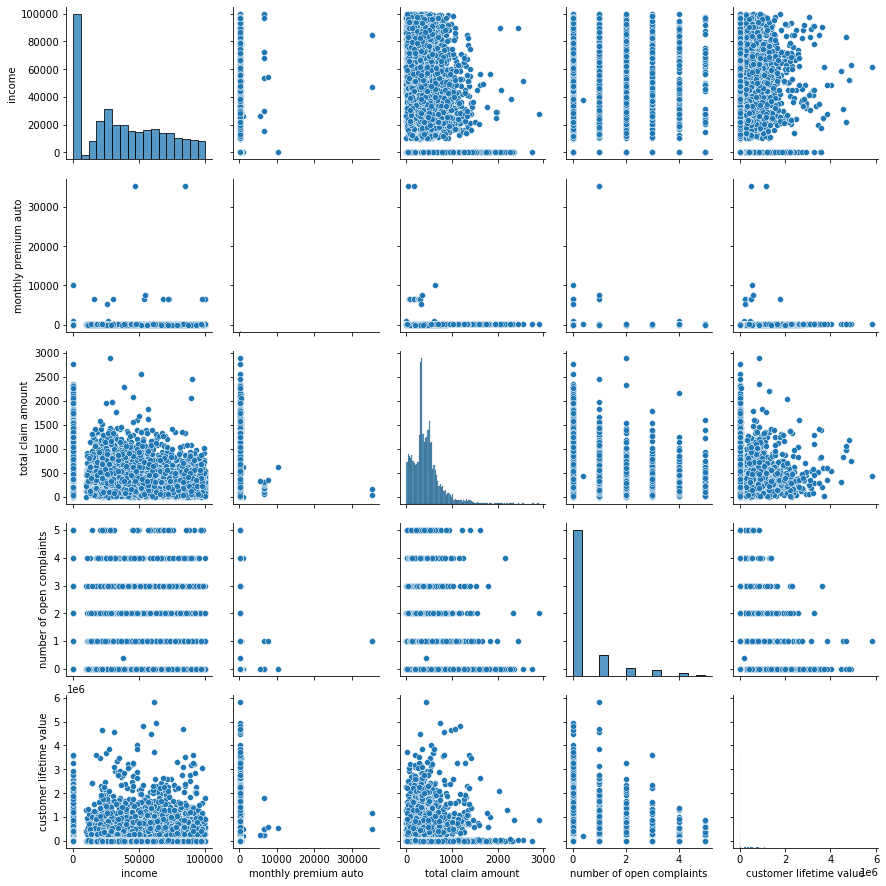

In [4]:
#Check the correlation between variables

sns.pairplot(customer_data)

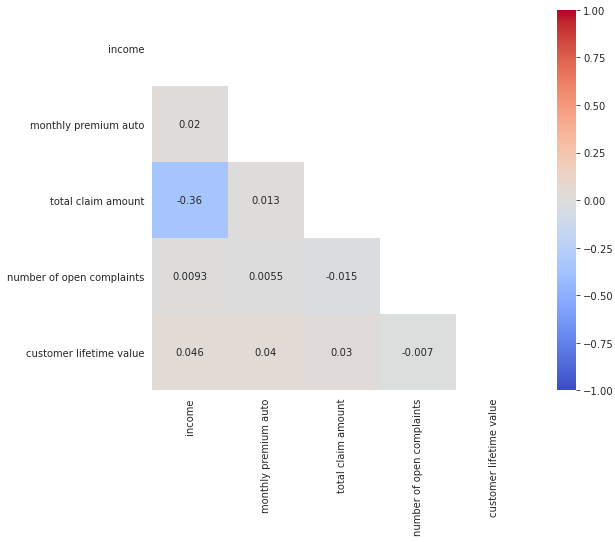

In [5]:
#Plot the correlation heatmap

corr = customer_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

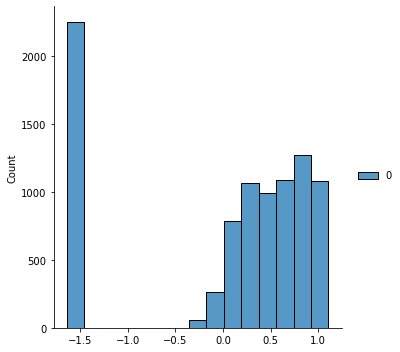

In [6]:
#Data Transformation with Power Transformer

pt = PowerTransformer()
income_transformed=pt.fit_transform(customer_data['income'].to_numpy().reshape(-1,1))
sns.displot(income_transformed)

In [7]:
#Add the normalized data to the dataframe and drop the original column
customer_data["income_transformed"]= income_transformed
customer_data.drop(["income"],axis=1,inplace=True)
print(customer_data.head())

           st gender             education ORIG customer lifetime value  \
0  washington    NaN                master                          NaN   
1     arizona      f              bachelor                   697953.59%   
2      nevada      f              bachelor                  1288743.17%   
3  california      m              bachelor                   764586.18%   
4  washington      m  high school or below                   536307.65%   

   monthly premium auto ORIG number of open complaints     policy type  \
0                1000.0                         1/0/00   personal auto   
1                  94.0                         1/0/00   personal auto   
2                 108.0                         1/0/00   personal auto   
3                 106.0                         1/0/00  corporate auto   
4                  68.0                         1/0/00   personal auto   

   vehicle class  total claim amount  number of open complaints  \
0  four-door car            2.704934 

In [10]:
#Hot coding Categorical Variables

categoricals_features= customer_data.select_dtypes("object")
categoricals_features.drop(["ORIG customer lifetime value"],axis=1,inplace=True)
categoricals_features.drop(["ORIG number of open complaints"],axis=1,inplace=True)
categoricals_features

C:\Users\Flo\anaconda3\envs\DA_IH\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,st,gender,education,policy type,vehicle class,zone
0,washington,NaN,master,personal auto,four-door car,east
1,arizona,f,bachelor,personal auto,four-door car,central
2,nevada,f,bachelor,personal auto,two-door car,central
3,california,m,bachelor,corporate auto,suv,west region
4,washington,m,high school or below,personal auto,four-door car,east
...,...,...,...,...,...,...
8871,california,m,bachelor,personal auto,four-door car,west region
8872,california,f,college,corporate auto,four-door car,west region
8873,california,m,bachelor,corporate auto,four-door car,west region
8874,california,m,college,personal auto,four-door car,west region


In [12]:
categorical_cols=pd.get_dummies(categoricals_features, drop_first=True)
categorical_cols

,st_california,st_nevada,st_oregon,st_washington,gender_m,education_bachelors,education_college,education_doctor,education_high school or below,education_master,policy type_personal auto,policy type_special auto,vehicle class_luxury car,vehicle class_luxury suv,vehicle class_sports car,vehicle class_suv,vehicle class_two-door car,zone_east,zone_north west,zone_west region
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8872,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8873,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8874,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [13]:
# x y split

X=customer_data.drop('total claim amount', axis=1)
y=customer_data["total claim amount"]

In [14]:
X=X._get_numeric_data()
X

,monthly premium auto,number of open complaints,customer lifetime value,income_transformed
0,1000.0,0.0,1.855902e+05,-1.640244
1,94.0,0.0,6.979536e+05,-1.640244
2,108.0,0.0,1.288743e+06,0.593721
3,106.0,0.0,7.645862e+05,-1.640244
4,68.0,0.0,5.363077e+05,0.410760
...,...,...,...,...
8871,73.0,0.0,2.340599e+04,0.859878
8872,79.0,0.0,3.096511e+03,0.120709
8873,85.0,3.0,8.163890e+03,-1.640244
8874,96.0,0.0,7.524442e+03,0.128748


In [15]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [16]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [17]:
X_test_scaled=std_scaler.transform(X_test)

In [18]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.04433068 -0.42624519  0.62659376  0.10464719]
 [ 0.00442564  0.67444531 -0.39958209  1.00868382]
 [-0.0582823  -0.42624519 -0.40256405  0.17555054]
 ...
 [-0.05448182 -0.42624519 -0.39081167 -1.65059783]
 [-0.02027749 -0.42624519  0.44639343  0.79432726]
 [-0.08298542  0.67444531 -0.40438946 -1.65059783]]
--------
[[-9.24866243e-02  6.74445314e-01 -3.88515853e-01  3.78046373e-01]
 [ 5.00314061e-02 -4.26245187e-01 -3.97684369e-01  8.05342661e-01]
 [ 1.69746552e-01 -4.26245187e-01 -3.29733244e-01 -1.65059783e+00]
 ...
 [ 4.42563635e-03 -4.26245187e-01 -3.91802337e-01 -1.65059783e+00]
 [-4.11801334e-02 -4.26245187e-01  1.11850233e+00  1.80447242e-01]
 [ 6.25155543e-04 -4.26245187e-01 -4.00007591e-01 -1.70261627e-01]]
